Aim:

Test for similaries between predictors for both targets - if similiaries are large than combine both target columns into one variable

- Explore distribution of independent variables betwen both targets
- combine both targets into one

In [242]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')

<Figure size 2000x1000 with 0 Axes>

In [243]:
df_candidates = pd.read_excel("../input_survey_data/survey_data_candidates_coords.xlsx")
df_candidates.tail(2)


,Target_direct_r,Target_direct_s,business_reduction_r,business_reduction_s,Q0.1,inundation_duration_h_r,water_depth_cm_r,warning_time_h_r,shp_damage_level_business_r,shp_damage_level_products_r,shp_closed_d_r,shp_duration_back2normal_r,inundation_duration_h_s,water_depth_cm_s,warning_time_h_s,shp_damage_level_business_s,shp_damage_level_products_s,shp_closed_d_s,shp_duration_back2normal_s,protect_valuables_impl,water_barries_impl,pumping_equipment_impl,elevation_building_impl,resistant_material_building_impl,electricity_higher_impl,flood_protections_impl,elevation_building_height_cm,insurance_business,building_elevation_rel2surrounding,building_elevation_rel2surrounding.cm,shp_sector,shp_sector.specify,shp_employees,shp_avgmonthly_sale_mVND,shp_capital_mVND,shp_risk_behaviour,shp_monetary_resources_prenvention,contaminations_r,contaminations_s,emergency_measures_r,emergency_measures_s,building_floor,lat,lon,geometry
250,NaN,NaN,40.0,70,6030010000000,4,20,0,4,2,0,0,2,10,0,4,2,2,4,1,4,4,5,4,4,5,150,2,0,50.0,17,NaN,1,1,0,2,1,2,2,2,4,1,NaN,NaN,NaN
251,NaN,NaN,20.0,100,5030020000000,4,10,99,1,1,0,0,5,20,99,1,1,14,20,1,1,5,3,2,5,5,100,2,0,25.0,17,NaN,1,2,0,3,3,2,2,8,8,0,NaN,NaN,NaN


In [244]:
df_recent = df_candidates.filter(regex="_r$", axis=1)
df_serious = df_candidates.filter(regex="_s$", axis=1)

In [245]:
df_recent

,Target_direct_r,business_reduction_r,inundation_duration_h_r,water_depth_cm_r,warning_time_h_r,shp_damage_level_business_r,shp_damage_level_products_r,shp_closed_d_r,shp_duration_back2normal_r,contaminations_r,emergency_measures_r
0,NaN,10.0,2,2,5,1,1,0,0,1,2
1,NaN,100.0,70,100,0,4,4,365,365,2,1
2,NaN,45.0,240,70,0,4,4,27,90,2,5
3,NaN,0.0,2,20,0,1,1,0,0,2,4
4,NaN,0.0,1,110,0,1,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
247,NaN,0.0,0,10,99,1,1,0,0,1,1
248,NaN,35.0,1,30,99,2,3,2,4,1,4
249,NaN,0.0,5,15,2,1,3,1,0,1,3
250,NaN,40.0,4,20,0,4,2,0,0,2,2


## Comparison plots

Code idea: https://stackoverflow.com/questions/51749208/plotting-two-histograms-from-a-pandas-dataframe-in-one-subplot-using-matplotlib


In [247]:
## concat both dfs horizontally
df_rs = pd.concat([df_recent, df_serious], axis=1)
#df_rs = pd.concat([df_recent.iloc[:,:3], df_serious.iloc[:,:3]], axis=1)
df_rs = df_rs.drop(["Target_direct_s", "Target_direct_r"],axis=1) 
df_rs.tail(3)


,business_reduction_r,inundation_duration_h_r,water_depth_cm_r,warning_time_h_r,shp_damage_level_business_r,shp_damage_level_products_r,shp_closed_d_r,shp_duration_back2normal_r,contaminations_r,emergency_measures_r,business_reduction_s,inundation_duration_h_s,water_depth_cm_s,warning_time_h_s,shp_damage_level_business_s,shp_damage_level_products_s,shp_closed_d_s,shp_duration_back2normal_s,contaminations_s,emergency_measures_s
249,0.0,5,15,2,1,3,1,0,1,3,10,10,20,99,3,1,3,7,2,3
250,40.0,4,20,0,4,2,0,0,2,2,70,2,10,0,4,2,2,4,2,4
251,20.0,4,10,99,1,1,0,0,2,8,100,5,20,99,1,1,14,20,2,8


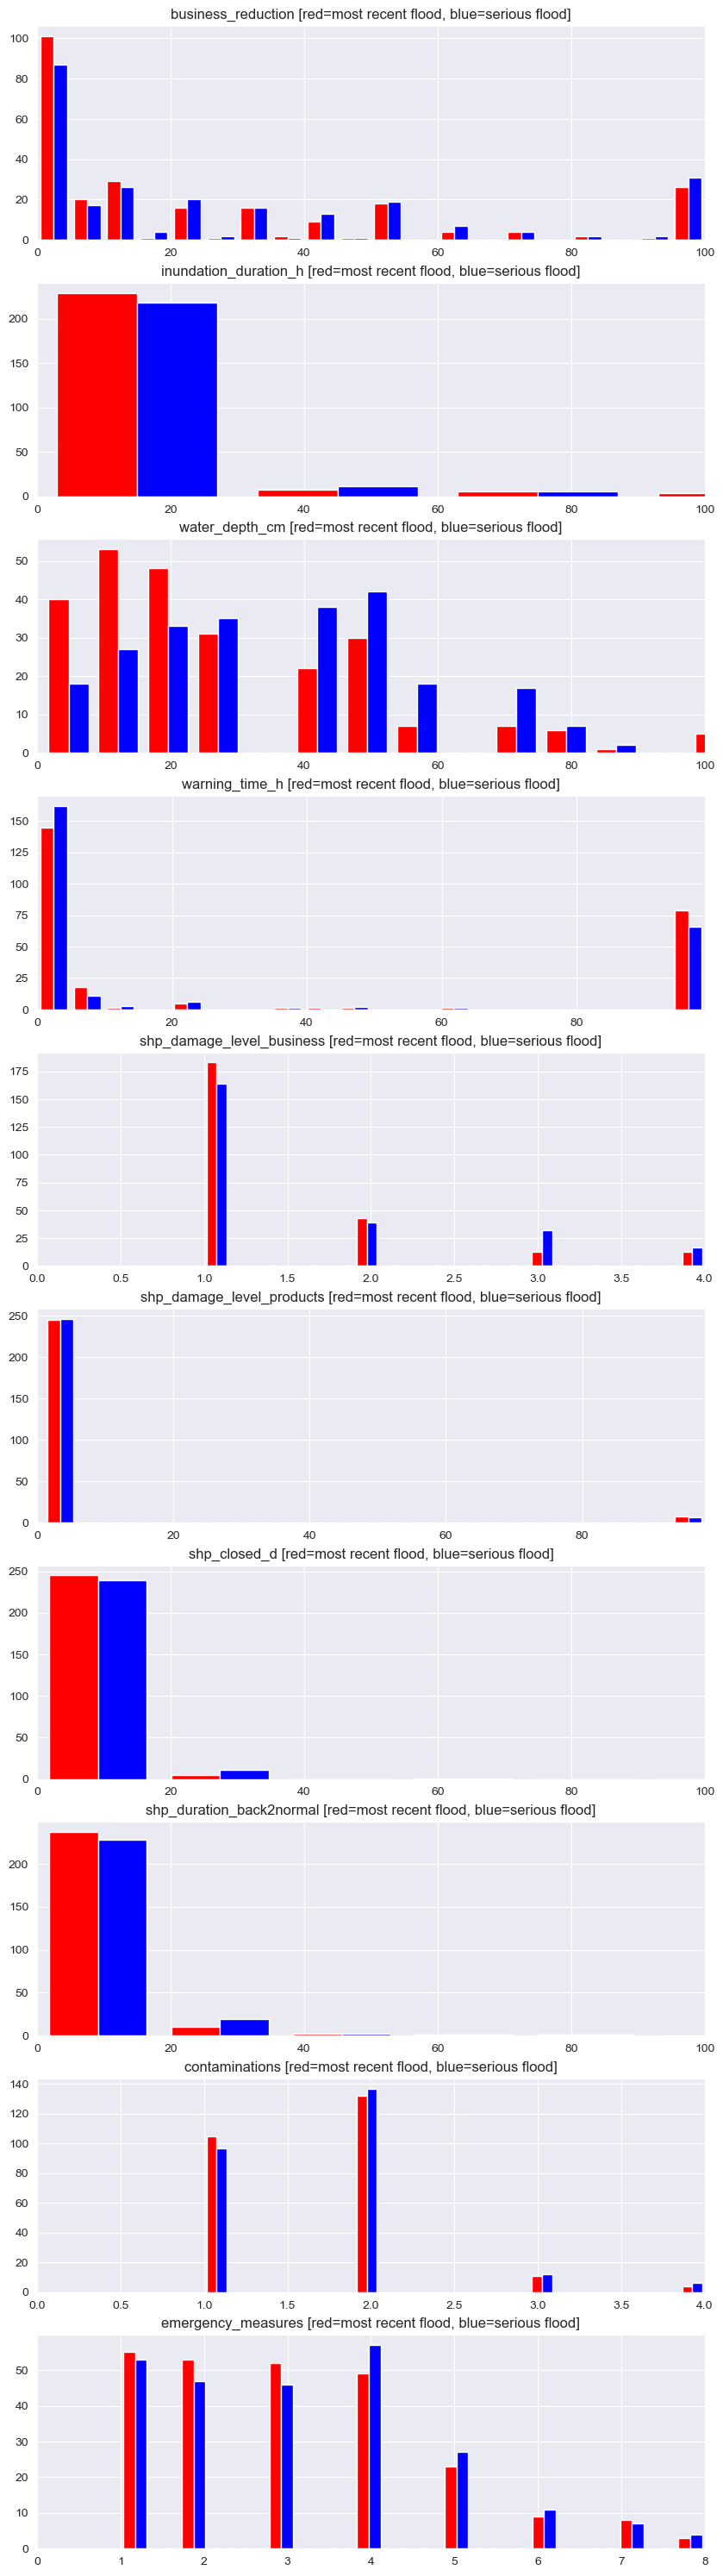

In [248]:

n = 10# len(df_serious.columns)  
n_bins = 8
#bins =4 

fig, ax = plt.subplots(n, figsize=(10, 38)) # sharex='col', sharey='row'

colors = ['red', 'blue']

# axes = ax.flatten()
# for i,j in zip(range(n), axes):
#     print(i)
#     j.hist([df_rs.iloc[:,i], df_rs.iloc[:,i+n]], bins=12, color=colors)
#     j.set_title(df_rs.columns[i][:-2])
# for i in range(n):
#     min_value = df_rs.iloc[:,[i,i+n]].min().min() #Get minimum value of column pairs, e.g. column 0 (a_wood) and column 3 (b_wood)
#     max_value = df_rs.iloc[:,[i,i+n]].max().max() #Get maximum value of column pairs
#     bins = np.linspace(min_value, max_value, n_bins) #Create bins of equal size between min_value and max_value
    
#     df_rs.hist(column=df_rs.columns[i], bins=int(max_value), ax=ax[i], alpha=0.5, color='red')
#     df_rs.hist(column=df_rs.columns[i+n], bins=int(max_value), ax=ax[i], alpha=0.5, color='blue')
#     ax[i].set_title(df_rs.columns[i][:-2])
#     if max_value > 100:
#         ax[i].set_xlim(0, 100)
#     else:
#         ax[i].set_xlim(0, max_value)
    #ax[i].legend(loc='upper right')

colors = ['red', 'blue']

axes = ax.flatten()
for i,j in zip(range(n), axes):
    min_value = df_rs.iloc[:,[i,i+n]].min().min() #Get minimum value of column pairs, e.g. column 0 (a_wood) and column 3 (b_wood)
    max_value = df_rs.iloc[:,[i,i+n]].max().max() #Get maximum value of column pairs
    #j.hist([df_rs.iloc[:,i], df_rs.iloc[:,i+n]], bins=int(max_value), color=colors)
    j.hist([df_rs.iloc[:,i], df_rs.iloc[:,i+n]], bins=20, color=colors)
    j.set_title(df_rs.columns[i][:-2] + " [red=most recent flood, blue=serious flood]")
    if max_value > 100:
        ax[i].set_xlim(0, 100)
    else:
        ax[i].set_xlim(0, max_value)



Text(0.5, 1.0, 'shp_damage_level_products[red=most recent flood, blue=serious flood]')

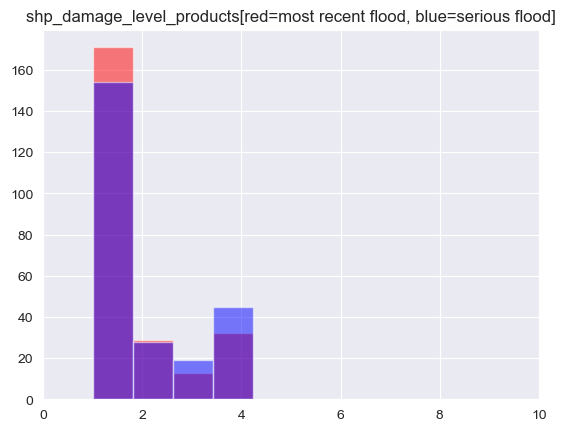

In [249]:
n = "shp_damage_level_products_r"
m = "shp_damage_level_products_s"
b = 120#len(df_rs[m].unique())

plt.hist(df_recent[n], bins=b, alpha=0.5, color='red')
plt.hist(df_serious[m], bins=b, alpha=0.5, color='b')
plt.xlim(0,10)
plt.title(m[:-2] +  "[red=most recent flood, blue=serious flood]")

Text(0.5, 1.0, 'shp_closed_d [red=most recent flood, blue=serious flood]')

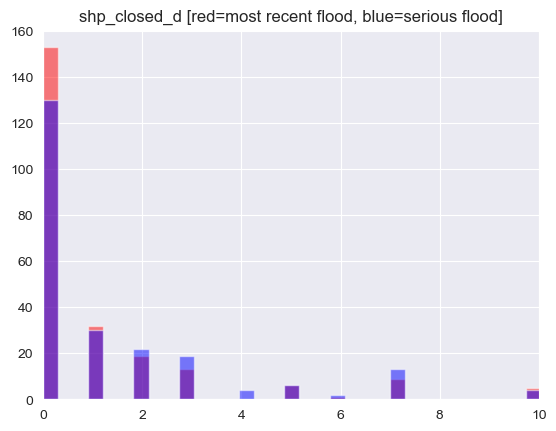

In [250]:
n = "shp_closed_d_r"
m = "shp_closed_d_s"
b = 1200
plt.hist(df_recent[n], bins=b, alpha=0.5, color='red')
plt.hist(df_serious[m], bins=b, alpha=0.5, color='b')
plt.xlim(0,10)
plt.title(m[:-2] + " [red=most recent flood, blue=serious flood]")

In [251]:
n = "shp_duration_back2normal_r"
m = "shp_duration_back2normal_s"
b = 1200

plt.hist(df_recent[n], bins=b, alpha=0.5, color='red')
plt.hist(df_serious[m], bins=b, alpha=0.5, color='b')
plt.xlim(0,10)
plt.title(m[:-2] + " [red=most recent flood, blue=serious flood]")

Text(0.5, 1.0, 'shp_duration_back2normal [red=most recent flood, blue=serious flood]')

#### Summarize
- slight differences exists between variables e.g  shp_damage_level_products: stronge damages on products for most serious flood
- but overall both target can be combined 

## combine both targets

In [ ]:
df_recent.columns = df_recent.columns.str.rstrip('_r') 
df_serious.columns = df_serious.columns.str.rstrip('_s') 

print(df_recent.columns)
print(df_serious.columns)

Index(['Target_direct', 'business_reduction', 'inundation_duration_h',
       'water_depth_cm', 'warning_time_h', 'shp_damage_level_business',
       'shp_damage_level_products', 'shp_closed_d', 'shp_duration_back2normal',
       'contaminations', 'emergency_measures'],
      dtype='object')
Index(['Target_direct', 'business_reduction', 'inundation_duration_h',
       'water_depth_cm', 'warning_time_h', 'shp_damage_level_busine',
       'shp_damage_level_product', 'shp_closed_d', 'shp_duration_back2normal',
       'contamination', 'emergency_measure'],
      dtype='object')


In [238]:
pd.concat([df_recent, df_serious], axis=0)#.shape

,Target_direct,business_reduction,inundation_duration_h,water_depth_cm,warning_time_h,shp_damage_level_business,shp_damage_level_products,shp_closed_d,shp_duration_back2normal,contaminations,emergency_measures,shp_damage_level_busine,shp_damage_level_product,contamination,emergency_measure
0,NaN,10.0,2,2,5,1.0,1.0,0,0,1.0,2.0,NaN,NaN,NaN,NaN
1,NaN,100.0,70,100,0,4.0,4.0,365,365,2.0,1.0,NaN,NaN,NaN,NaN
2,NaN,45.0,240,70,0,4.0,4.0,27,90,2.0,5.0,NaN,NaN,NaN,NaN
3,NaN,0.0,2,20,0,1.0,1.0,0,0,2.0,4.0,NaN,NaN,NaN,NaN
4,NaN,0.0,1,110,0,1.0,1.0,0,0,2.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,NaN,0.0,5,10,99,NaN,NaN,0,0,NaN,NaN,1.0,1.0,1.0,1.0
248,NaN,95.0,2,50,99,NaN,NaN,3,7,NaN,NaN,3.0,4.0,1.0,4.0
249,NaN,10.0,10,20,99,NaN,NaN,3,7,NaN,NaN,3.0,1.0,2.0,3.0
250,NaN,70.0,2,10,0,NaN,NaN,2,4,NaN,NaN,4.0,2.0,2.0,4.0
